## Observations and Insights 

*Capomulin shows promising results in reducing tumor volumes over the 45 day test period - of all drug regimens tested, it had the greatest number of mice remaining after 45 days.  As shown for the mouse S185 in particular, tumor volume was cut by half over the 45 day test period.

*The only regimen that yielded a smaller average tumor volume than Capomulin (40.676 mm^3) over the course of the study was Ramicane at 40.217 mm^3.  Its median final tumor volume was 36.562 versus Capomulin's of 38.125, however Capomulin managed to have more mice alive at the end of the 45 days so that should be taken into consideration when analyzing these results.  It's clear from the data more comparison trials/analysis should be done with Capomulin and the competitor Ramicane.

*Mouse Weight and Average Tumor Volume have a correlation coeficient of r=0.84 and r-squared = 0.71 showing strong correlation.  Future studies should control for mouse weight across regimens and we may need to examine in more detail the results from other competitive drugs to see if final tumor volumes/mortality could have been thrown off from bigger mice in those samples.

*The study had a 50/50 ratio of male to female mice - drilling into final results based on gender would be another avenue to pursue.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
combined_data['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data['Mouse ID'].loc[combined_data.duplicated(subset = ['Mouse ID','Timepoint']) == True]

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
combined_data.loc[combined_data.duplicated(subset = ['Mouse ID','Timepoint']) == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = combined_data.drop_duplicates(subset =['Mouse ID','Timepoint'], keep = 'first')

In [7]:
# Checking the number of mice in the clean DataFrame.
combined_clean['Mouse ID'].count()

1888

## Summary Statistics

In [8]:
#find all various drug regimens and store in its own list to then generate a for loop below
drug_list = combined_clean['Drug Regimen'].unique()
drug_list

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

#create lists to aggregate tumor statistics by drug regimen
drug_mean=[]
drug_median=[]
drug_variance=[]
drug_std=[]
drug_sem=[]

#for statement to go through drug list and run calculations for each drug and aggregate into their respective series
for drug in drug_list:
    drug_df = combined_clean.loc[combined_clean['Drug Regimen'] == drug]
    tumor_data = drug_df['Tumor Volume (mm3)']
    drug_mean.append(np.mean(tumor_data).round(3))
    drug_median.append(np.median(tumor_data).round(3))
    drug_variance.append(np.var(tumor_data).round(3))
    drug_std.append(np.std(tumor_data).round(3))
    drug_sem.append(st.sem(tumor_data).round(3))
    
#aggregate summary statistics into new dataframe with drug_list serving as the index
drug_stats = pd.DataFrame({"Tumor Vol Mean (mm3)": drug_mean,
                           "Tumor Vol Median (mm3)": drug_median,
                           "Tumor Vol Var (mm3)": drug_variance,
                           "Tumor Vol Std Dev (mm3)": drug_std,
                           "Tumor Vol SEM (mm3)": drug_sem}, index=drug_list)

drug_stats    

,Tumor Vol Mean (mm3),Tumor Vol Median (mm3),Tumor Vol Var (mm3),Tumor Vol Std Dev (mm3),Tumor Vol SEM (mm3)
Capomulin,40.676,41.558,24.839,4.984,0.329
Ketapril,55.236,53.699,68.189,8.258,0.604
Naftisol,54.332,52.509,65.818,8.113,0.596
Infubinol,52.885,51.821,42.886,6.549,0.492
Stelasyn,54.233,52.432,59.122,7.689,0.573
Ramicane,40.217,40.673,23.384,4.836,0.321
Propriva,52.393,50.910,42.862,6.547,0.526
Zoniferol,53.237,51.818,48.267,6.947,0.516
Placebo,54.034,52.289,60.830,7.799,0.581
Ceftamin,52.591,51.776,39.069,6.251,0.470


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

grouped_regimen = combined_clean.groupby('Drug Regimen')
tumor_data = grouped_regimen["Tumor Volume (mm3)"]

grouped_regimen_df = pd.DataFrame({"Tumor Vol Mean (mm3)": tumor_data.apply(np.mean).round(3),
                                   "Tumor Vol Median (mm3)": tumor_data.apply(np.median).round(3),
                                   "Tumor Vol Var (mm3)": tumor_data.apply(np.var).round(3),
                                   "Tumor Vol Std Dev (mm3)": tumor_data.apply(np.std).round(3),
                                   "Tumor Vol SEM (mm3)": tumor_data.apply(st.sem).round(3)})

grouped_regimen_df

,Tumor Vol Mean (mm3),Tumor Vol Median (mm3),Tumor Vol Var (mm3),Tumor Vol Std Dev (mm3),Tumor Vol SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.839,4.984,0.329
Ceftamin,52.591,51.776,39.069,6.251,0.470
Infubinol,52.885,51.821,42.886,6.549,0.492
Ketapril,55.236,53.699,68.189,8.258,0.604
Naftisol,54.332,52.509,65.818,8.113,0.596
Placebo,54.034,52.289,60.830,7.799,0.581
Propriva,52.393,50.910,42.862,6.547,0.526
Ramicane,40.217,40.673,23.384,4.836,0.321
Stelasyn,54.233,52.432,59.122,7.689,0.573


## Bar Plots

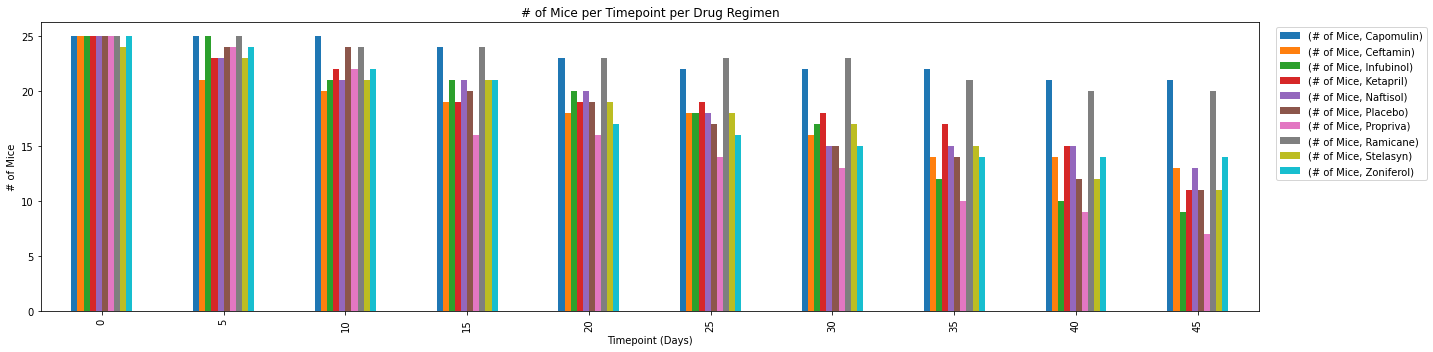

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#GroupBy Timepoint and Drug Regimen and then format new DataFrame with count of Mice
group_time = combined_clean.groupby(['Drug Regimen','Timepoint'])
group_time_df = pd.DataFrame(group_time['Mouse ID'].count())

#Rename 'Mouse ID' column to 'Mouse Count' for clarity
group_df = group_time_df.rename(columns={'Mouse ID':'# of Mice'})

#Utilize .unstack(0) for formatting bar chart, groups each mouse count/regimen over timepoint
count_chart = group_df.unstack(0).plot(kind='bar',figsize=(20,5))

#format bar chart axes labels,legend
plt.title("# of Mice per Timepoint per Drug Regimen")
count_chart.set_xlabel("Timepoint (Days)")
count_chart.set_ylabel("# of Mice")
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='best')
plt.tight_layout()
plt.show()



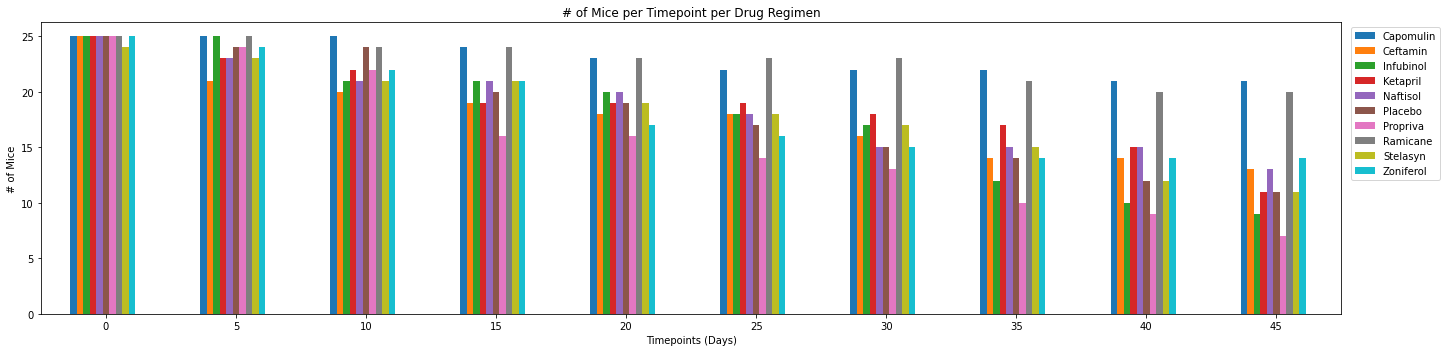

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_list = combined_clean['Drug Regimen'].unique()

#drug_list prints 'Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
#'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'

#convert list of Timepoints from int to objects for xtick formatting
timepoints = combined_clean['Timepoint'].unique()

#create a list of mouse counts per drug regimen/time point with a nested for loop
count=[]

for drug in drug_list:
    drug_df = combined_clean.loc[combined_clean['Drug Regimen'] == drug]
    for time in timepoints:
        drug_time = drug_df.loc[drug_df['Timepoint'] == time]
        count.append(drug_time['Mouse ID'].count())

#slice count list of mice numbers into their respective lists by regimen        
capo_count = count[:10]
keta_count = count[10:20]
naft_count = count[20:30]
infu_count = count[30:40]
stel_count = count[40:50]
rami_count = count[50:60]
prop_count = count[60:70]
zoni_count = count[70:80]
plac_count = count[80:90]
ceft_count = count[90:100]

#bar graph plotting and formatting metrics
timepoints.astype('object')
labels = timepoints
x=np.arange(len(labels))
width=0.05
plt.figure(figsize=(20,5))
capo = plt.bar(x-(5*width),capo_count,width,label=drug_list[0])
ceft = plt.bar(x-(4*width),ceft_count,width,label=drug_list[9])
infu = plt.bar(x-(3*width),infu_count,width,label=drug_list[3])
keta = plt.bar(x-(2*width),keta_count,width,label=drug_list[1])
naft = plt.bar(x-width,naft_count,width,label=drug_list[2])
plac = plt.bar(x,plac_count,width,label=drug_list[8])
prop = plt.bar(x+width,prop_count,width,label=drug_list[6])
rami = plt.bar(x+(2*width),rami_count,width,label=drug_list[5])
stel = plt.bar(x+(3*width),stel_count,width,label=drug_list[4])
zoni = plt.bar(x+(4*width),zoni_count,width,label=drug_list[7])

#format axes and labels
plt.xticks(x, labels)
plt.legend(bbox_to_anchor=(1.08, 1.0), loc='best')
plt.title("# of Mice per Timepoint per Drug Regimen")
plt.xlabel("Timepoints (Days)")
plt.ylabel("# of Mice")
plt.xlim(-0.5,9.5)
plt.tight_layout()
plt.show()

## Pie Plots

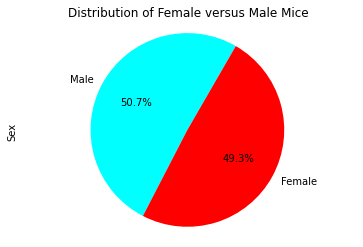

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_clean['Sex'].value_counts().plot(kind='pie',startangle=60,autopct='%1.1f%%',colors=['aqua','red'])

plt.title("Distribution of Female versus Male Mice")
plt.axis("equal")

plt.show()

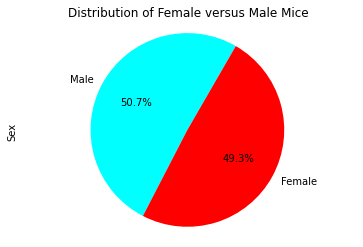

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders_df = pd.DataFrame(combined_clean['Sex'].value_counts())
gender = list(genders_df.index.values)
gender_count = genders_df["Sex"]
colors = ['aqua','red']
plt.pie(gender_count,labels=gender,colors=colors,autopct='%1.1f%%',startangle=60)
plt.title("Distribution of Female versus Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#choose four drugs for analysis per HW Readme -'Capomulin, Ramicane, Infubinol, and Ceftamin'

#format into new DF
four_drug_df=combined_clean.loc[(combined_clean['Drug Regimen'] == 'Capomulin') |
                                (combined_clean['Drug Regimen'] == 'Ramicane') |
                                (combined_clean['Drug Regimen'] == 'Infubinol') |
                                (combined_clean['Drug Regimen'] == 'Ceftamin')]
four_drug_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [16]:
#group the dataframe by Drug Regimen and Mouse ID then find the \
#max timepoint for each mouse as that will also be the row on which final tumor vol for each mouse is found
four_grouped = four_drug_df.groupby(['Drug Regimen','Mouse ID'])
max_timepoint = four_grouped['Timepoint'].max().reset_index()

#merge the grouped/max timepoint dataframe with original dataframe with inner join to trim away all prev 
#timepoint/tumor vol data and only be left w/ that last timepoint/vol for each mouse
last_tumor_size_df=pd.merge(four_drug_df,max_timepoint,on=['Drug Regimen','Mouse ID','Timepoint'])

#for loop to run calculations on IQR/outlier data and print data/potential outlier parameters below
four_drugs=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
for drug in four_drugs:
    last_tumor = last_tumor_size_df.loc[last_tumor_size_df['Drug Regimen'] == drug]
    quartiles=last_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = round(quartiles[.25],3)
    upperq = round(quartiles[.75],3)
    iqr = round(upperq - lowerq,3)

    lower_bound = round(lowerq - (1.5*iqr),3)
    upper_bound = round(upperq + (1.5*iqr),3)

    print(f"{drug}")
    print(f"The lower quartile of final tumor vol is: {lowerq}")
    print(f"The upper quartile of final tumor vol is: {upperq}")
    print(f"The interquartile range of final tumor Vol is: {iqr}")
    print(f"The the median of final tumor vols is: {round(quartiles[0.5],3)} ")
    print(f"Final tumor vols below {lower_bound} could be outliers.")
    print(f"Final tumor vols above {upper_bound} could be outliers.")
    print(f"---------------------------------------------------")

Capomulin
The lower quartile of final tumor vol is: 32.377
The upper quartile of final tumor vol is: 40.159
The interquartile range of final tumor Vol is: 7.782
The the median of final tumor vols is: 38.125 
Final tumor vols below 20.704 could be outliers.
Final tumor vols above 51.832 could be outliers.
---------------------------------------------------
Ramicane
The lower quartile of final tumor vol is: 31.56
The upper quartile of final tumor vol is: 40.659
The interquartile range of final tumor Vol is: 9.099
The the median of final tumor vols is: 36.562 
Final tumor vols below 17.911 could be outliers.
Final tumor vols above 54.308 could be outliers.
---------------------------------------------------
Infubinol
The lower quartile of final tumor vol is: 54.049
The upper quartile of final tumor vol is: 65.526
The interquartile range of final tumor Vol is: 11.477
The the median of final tumor vols is: 60.165 
Final tumor vols below 36.834 could be outliers.
Final tumor vols above 82.74

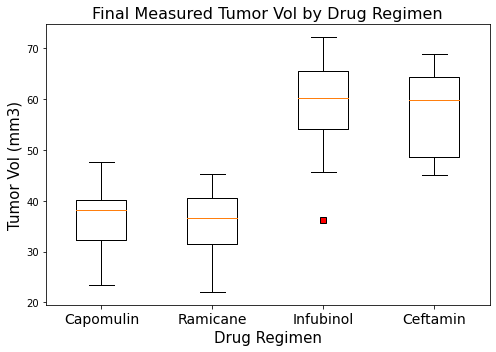

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#gather lists of tumor vols for each regimen and put into pyplot boxplot/format
last_tumor_cap = last_tumor_size_df.loc[last_tumor_size_df['Drug Regimen'] == 'Capomulin']
cap_vols = list(last_tumor_cap['Tumor Volume (mm3)'])

last_tumor_ram = last_tumor_size_df.loc[last_tumor_size_df['Drug Regimen'] == 'Ramicane']
ram_vols = list(last_tumor_ram['Tumor Volume (mm3)'])

last_tumor_inf = last_tumor_size_df.loc[last_tumor_size_df['Drug Regimen'] == 'Infubinol']
inf_vols = list(last_tumor_inf['Tumor Volume (mm3)'])

last_tumor_cef = last_tumor_size_df.loc[last_tumor_size_df['Drug Regimen'] == 'Ceftamin']
cef_vols = list(last_tumor_cef['Tumor Volume (mm3)'])

red_square = dict(markerfacecolor='r', marker='s')
x=np.arange(1,5,1)
fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.set_title('Final Measured Tumor Vol by Drug Regimen',fontsize=16)
ax1.set_xlabel('Drug Regimen',fontsize=15)
ax1.set_ylabel('Tumor Vol (mm3)',fontsize=15)
ax1.boxplot([cap_vols,ram_vols,inf_vols,cef_vols],flierprops=red_square)
plt.xticks(x,four_drugs,fontsize=14)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

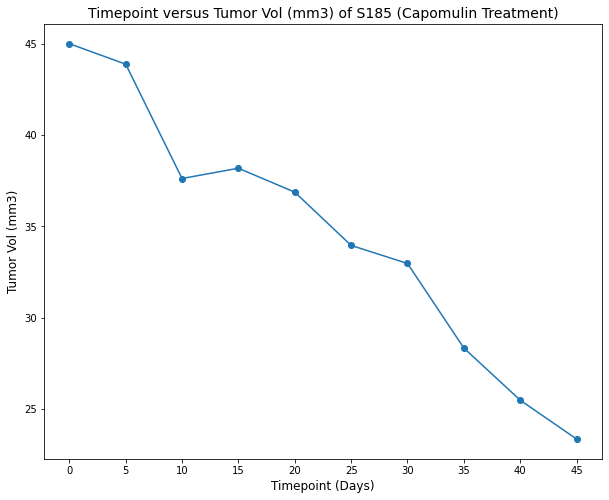

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combined_clean.loc[combined_clean['Drug Regimen']=='Capomulin']
cap_df.head(50)
#see that s185 is one of the mice treated with Capomulin
mouse_cap_df = cap_df.loc[cap_df['Mouse ID'] == 's185']
mouse_cap_df

plt.figure(figsize=(10,8))
plt.plot(mouse_cap_df['Timepoint'],mouse_cap_df['Tumor Volume (mm3)'], marker='o')
plt.xlabel("Timepoint (Days)",fontsize=12)
plt.ylabel("Tumor Vol (mm3)",fontsize=12)
plt.title("Timepoint versus Tumor Vol (mm3) of S185 (Capomulin Treatment)", fontsize=14)
plt.xticks(np.arange(0,50,5))
plt.show()


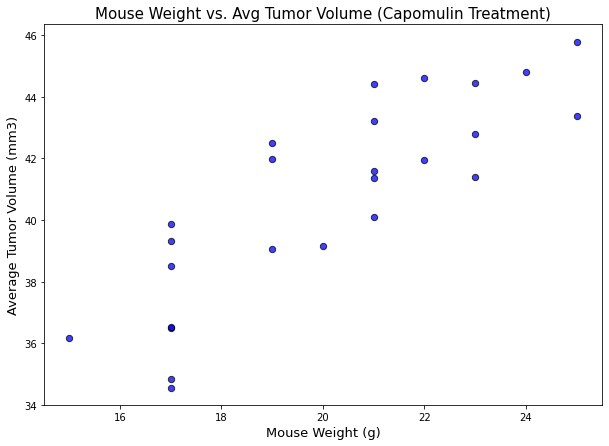

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mice = cap_df.groupby(['Mouse ID'])
cap_mice_avgtum = cap_mice['Tumor Volume (mm3)'].mean()
cap_avgtum_df = cap_mice_avgtum.reset_index()
cap_avgtum_wgt_df = pd.merge(cap_avgtum_df,mouse_metadata,on=['Mouse ID'])
cap_avgtum_wgt_df

cap_mice.count()

x_wgt = cap_avgtum_wgt_df['Weight (g)']
y_vol = cap_avgtum_wgt_df['Tumor Volume (mm3)']
plt.figure(figsize=(10,7))
plt.scatter(x_wgt, y_vol, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.title('Mouse Weight vs. Avg Tumor Volume (Capomulin Treatment)',fontsize=15)
plt.xlabel('Mouse Weight (g)',fontsize=13)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=13)
plt.show()



## Correlation and Regression

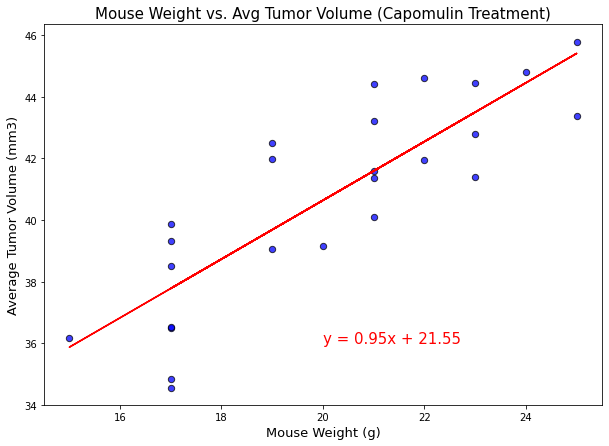

Correlation Coeficient (r) is: 0.84
The r-squared value is: 0.71


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_wgt = cap_avgtum_wgt_df['Weight (g)']
y_vol = cap_avgtum_wgt_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_wgt, y_vol)
regress_values = x_wgt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,7))
plt.scatter(x_wgt, y_vol, marker="o", facecolors="blue", edgecolors="black",s=40, alpha=.75)
plt.plot(x_wgt,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Mouse Weight vs. Avg Tumor Volume (Capomulin Treatment)',fontsize=15)
plt.xlabel('Mouse Weight (g)',fontsize=13)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=13)
plt.show()
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")
